<a href="https://colab.research.google.com/github/pharringtonp19/housing-and-homelessness/blob/main/notebooks/homeless_counts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!git clone https://github.com/pharringtonp19/housing-and-homelessness.git

fatal: destination path 'housing-and-homelessness' already exists and is not an empty directory.


In [25]:
!pip install pyxlsb

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option('display.max_columns', None)
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter

### **Time Series Counts**

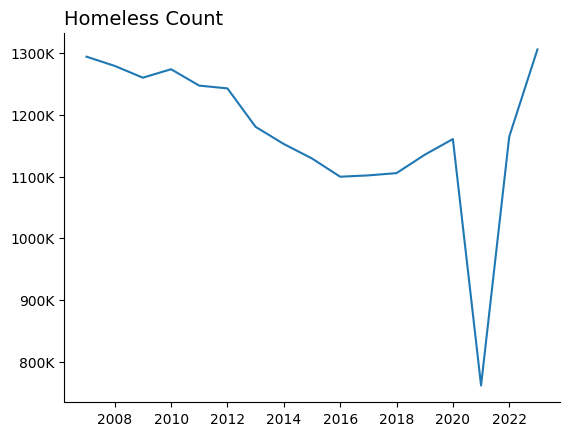

In [79]:
def thousands_formatter(x, pos):
    return f'{int(x / 1000)}K'

years = list(range(2007, 2024))
counts = []
for year in years:
  df = pd.read_excel('/content/housing-and-homelessness/datasets/2007-2023-PIT-Counts-by-State.xlsb', engine='pyxlsb', sheet_name=str(year))
  df['Overall Homeless'] = pd.to_numeric(df['Overall Homeless'], errors='coerce')
  counts.append( df['Overall Homeless'].sum())

plt.plot(years, counts)
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title('Homeless Count', size=14, loc='left')

plt.show()

In [80]:
df.head()

State  Number of CoCs  Overall Homeless Overall Homeless - Under 18  \
0    AK             2.0            2614.0                         361   
1    AL             8.0            3304.0                         560   
2    AR             5.0            2609.0                         304   
3    AS             0.0               NaN                               
4    AZ             3.0           14237.0                        1585   

  Overall Homeless - Age 18 to 24 Overall Homeless - Age 25 to 34  \
0                             227                             501   
1                             178                             514   
2                             177                             483   
3                                                                   
4                             996                            2776   

  Overall Homeless - Age 35 to 44 Overall Homeless - Age 45 to 54  \
0                             609                             459   
1                             684                             608   
2                             550                             557   
3                                                                   
4                            3072                            2511   

  Overall Homeless - Age 55 to 64 Overall Homeless - Over 64  \
0                             346                        111   
1                             555                        205   
2                             399                        139   
3                                                              
4                            2234                       1063   

  Overall Homeless - Female Overall Homeless - Male  \
0                       991                    1600   
1                      1258                    2010   
2                      1006                    1580   
3                                                     
4                      4893                    9186   

  Overall Homeless - Transgender  \
0                             16   
1                             23   
2                             13   
3                                  
4                             52   

  Overall Homeless - Gender that is not Singularly Female or Male  \
0                                                  5                
1                                                  7                
2                                                  6                
3                                                                   
4                                                 37                

  Overall Homeless - Gender Questioning  \
0                                     2   
1                                     6   
2                                     4   
3                                         
4                                    69   

  Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)  \
0                                               2355   
1                                               3188   
2                                               2474   
3                                                      
4                                              10311   

  Overall Homeless - Hispanic/Latin(o)(a)(x) Overall Homeless - White  \
0                                        259                      796   
1                                        116                     1349   
2                                        135                     1696   
3                                                                       
4                                       3926                     9011   

  Overall Homeless - Black, African American, or African  \
0                                                181       
1                                               1787       
2                                                733       
3                                                          
4                                               30

In [27]:
df = pd.read_excel('/content/housing-and-homelessness/datasets/2007-2023-PIT-Counts-by-State.xlsb', engine='pyxlsb', sheet_name='2023')
df['Overall Homeless'] = pd.to_numeric(df['Overall Homeless'], errors='coerce')

In [57]:


# Verify and rename columns for easier reference
df.rename(columns={"State": "state", "Overall Homeless": "homeless_count"}, inplace=True)

# Plot the choropleth map
fig = px.choropleth(
    df,
    locations="state",              # Column with state abbreviations
    locationmode="USA-states",       # Specify it's US states
    color="homeless_count",          # Column indicating the number of homeless individuals
    color_continuous_scale="Blues",  # Color scale that intensifies with higher values
    scope="usa",                     # Focus the map on the USA
    labels={'homeless_count': 'Homeless Count'}, # Label for color indicator
    title="Overall Homelessness by State"
)

# Adjust color bar for clarity
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Number of Homeless",
        ticks="outside"
    )
)

fig.show()

In [56]:
df['Overall Homeless'].sum(skipna=True)

1306208.0

In [44]:
# Sample structure of your DataFrame (modify if column names differ slightly)
# Assuming 'Overall Homeless -- Female', 'Overall Homeless -- Male', 'Overall Homeless -- Transgender' are the column names
df = df.rename(columns={
    "Overall Homeless - Female": "homeless_female",
    "Overall Homeless - Male": "homeless_male",
    "Overall Homeless - Transgender": "homeless_transgender"})

# # Calculate the total homeless count across categories for each row
df['total_homeless'] = df[['homeless_female', 'homeless_male', 'homeless_transgender']].sum(axis=1)

# Calculate the percentage for each category
df['percent_female'] = (df['homeless_female'] / df['total_homeless']) * 100
df['percent_male'] = (df['homeless_male'] / df['total_homeless']) * 100
df['percent_transgender'] = (df['homeless_transgender'] / df['total_homeless']) * 100

# Create a bar chart to show the relative percentages
plt.figure(figsize=(8, 6))
gender_categories = ['Female', 'Male', 'Transgender']
percentages = [df['percent_female'].mean(), df['percent_male'].mean(), df['percent_transgender'].mean()]

plt.bar(gender_categories, percentages)
plt.xlabel("Gender")
plt.ylabel("Average Percentage of Homeless Population")
plt.title("Relative Percentage Distribution of Homeless Population by Gender")
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'str'

In [48]:
df['homeless_female'].dtype

dtype('O')

In [41]:
df.columns[:15]

Index(['State', 'Number of CoCs', 'Overall Homeless',
       'Overall Homeless - Under 18', 'Overall Homeless - Age 18 to 24',
       'Overall Homeless - Age 25 to 34', 'Overall Homeless - Age 35 to 44',
       'Overall Homeless - Age 45 to 54', 'Overall Homeless - Age 55 to 64',
       'Overall Homeless - Over 64', 'Overall Homeless - Female',
       'homeless_male', 'homeless_transgender',
       'Overall Homeless - Gender that is not Singularly Female or Male',
       'Overall Homeless - Gender Questioning'],
      dtype='object')

In [21]:
# Verify and rename columns for easier reference
df.rename(columns={"State": "state", "Overall Homeless": "homeless_count"}, inplace=True)

# Plot the choropleth map
fig = px.choropleth(
    df,
    locations="state",              # Column with state abbreviations
    locationmode="USA-states",       # Specify it's US states
    color="homeless_count",          # Column indicating the number of homeless individuals
    color_continuous_scale="Blues",  # Color scale that intensifies with higher values
    scope="usa",                     # Focus the map on the USA
    labels={'homeless_count': 'Homeless Count'}, # Label for color indicator
    title="Overall Homelessness by State"
)

# Adjust color bar for clarity
fig.update_layout(
    coloraxis_colorbar=dict(
        title="Number of Homeless",
        ticks="outside"
    )
)

fig.show()